<a href="https://colab.research.google.com/github/argent0/tensorflow-course/blob/master/AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoencoder for MNIST Data

In [2]:
!pip install -q tensorflow==2.0.0-alpha0
!pip install -q tensorflow-datasets

    100% |████████████████████████████████| 79.9MB 581kB/s 
    100% |████████████████████████████████| 61kB 25.8MB/s 
    100% |████████████████████████████████| 3.0MB 11.5MB/s 
    100% |████████████████████████████████| 419kB 22.3MB/s 
    100% |████████████████████████████████| 409kB 13.9MB/s 


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd

import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

from keras.datasets import mnist

import numpy as np

print(tf.__version__)

2.0.0-alpha0


Using TensorFlow backend.


In [4]:
# Load the Mnist dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


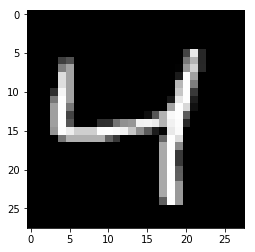

In [5]:
# Display one digit
plt.imshow(x_train[2], cmap=plt.cm.gray)


In [6]:
# normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)

(60000, 784)


## The model

In [0]:
encoding_dim = 28*7 #75% reduction

# This is the input placeholder
input_img = keras.layers.Input(shape=(28*28,))


# "endoded" is the encoded representation of the input
encoded = keras.layers.Dense(encoding_dim, activation=tf.nn.relu)(input_img)

#decoded is the lossy reconstruction of the input
decoded = keras.layers.Dense(28*28, activation=tf.nn.sigmoid)(encoded)

In [0]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

#separated encoder model
encoder = keras.Model(input_img, encoded)

#decoder model
# Place holder for an encoded input
encoded_input = keras.layers.Input(shape=(encoding_dim,))

#retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

#create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [0]:
# compile the models
autoencoder.compile(optimizer='adam', loss='mean_squared_error',
                   metrics=['mean_squared_error'])

In [0]:
# learning curve
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()


In [99]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

# fit the model

#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,
               shuffle=True, validation_data=(x_test, x_test),
               verbose=0,
               callbacks=[PrintDot()])




..................................................

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
0,0.044062,0.044062,0.019353,0.019353,0
1,0.013999,0.013999,0.009748,0.009748,1
2,0.008131,0.008131,0.006390,0.006390,2
3,0.005674,0.005674,0.004764,0.004764,3
4,0.004377,0.004377,0.003810,0.003810,4
5,0.003632,0.003632,0.003242,0.003242,5
6,0.003141,0.003141,0.002905,0.002905,6
7,0.002801,0.002801,0.002550,0.002550,7
8,0.002515,0.002515,0.002340,0.002340,8
9,0.002321,0.002321,0.002188,0.002188,9


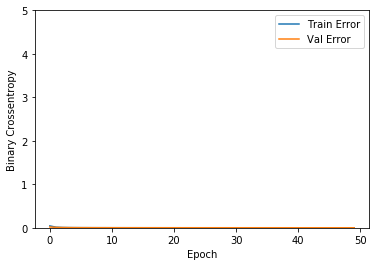

In [100]:
plot_history(history)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

hist

In [0]:
# let's see the "results"
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

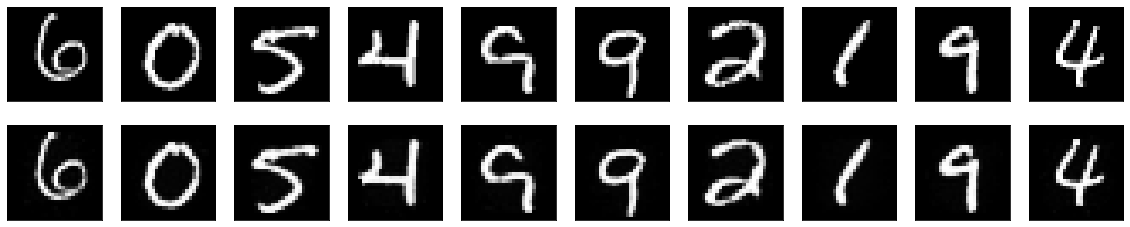

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.19209290e-07,  0.00000000e+00,  0.00000000e+00,
        2.98023224e-08,  0.00000000e+00,  5.96046448e-08,  0.00000000e+00,
        2.98023224e-08,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.98023224e-08,  2.98023224e-08,
        0.00000000e+00,  1.19209290e-07,  0.00000000e+00,  0.00000000e+00,
        2.98023224e-08,  0.00000000e+00,  0.00000000e+00,  8.94069672e-08,
        0.00000000e+00,  0.00000000e+00,  8.94069672e-08,  0.00000000e+00,
        2.98023224e-08,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.08616257e-07,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.49011612e-07,  0.00000000e+00,
        0.00000000e+00,  

In [102]:

n = 10 #n of digits to display
plt.figure(figsize=(20,4))
for i in range(n):
  #display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[100+i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  #diplay the reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[100+i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  

plt.show()

decoded_imgs[1] - x_test[1]

In [103]:
encoding_dim

196